In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

In [270]:

data = pd.read_excel('parameters.xlsx')

V0 = data['V'].values
tp = data['t'].values
Tme = data['exp Tmax'].values
tpe = data['exp t_p'].values


In [271]:
# Time
dt = 1e-4
t = np.arange(dt,1.5+dt,dt)

# heat transfer
T0 = 730
T = np.zeros(len(t))+T0


In [272]:
def power(V0,tp):
    # Power funciton
    wv = np.zeros(len(t))
    a = 0.003
    b = tp
    c = 1e-5
    d = 1.1

    for i in range(len(t)):
        if t[i] < 0.01:
            wv[i] = c
        elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
            wv[i] = c + 2/a**2*(t[i]-0.01)**2
        elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
            wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
        elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
            wv[i] = c + 1
        elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
            wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
        elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
            wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
        else:
            wv[i] = c

    V = V0 * wv
    return V**2/4.418081

In [273]:
def heat_balance(V0,tp):
    kh_para = [-9.32565889e-02 , 2.09599833e-04,  1.77346997e+02, -1.21625012e+01 , 1.96267900e-01, -1.62168276e+03 , 9.80895011e+01 ,-1.30744631e+00 ,3.86314934]
    ht_para = [-4.21826078e-02 , 3.00437126e-04,  2.24196385e+01 ,-1.95811501e+00 ,  3.13161887e-02 ,-1.69467657e+02 , 9.93414871e+00 ,-7.06820597e-02,1.31282631]
    kh = kh_para[0]*V0 + kh_para[1]*(V0**2) + \
         kh_para[2]*(tp**1)*(V0**0) + kh_para[3]*(tp**1)*(V0**1) + kh_para[4]*(tp**1)*(V0**2) + \
         kh_para[5]*(tp**2)*(V0**0)  + kh_para[6]*(tp**2)*(V0**1) + kh_para[7]*(tp**2)*(V0**2) + kh_para[8]
    ht = ht_para[0]*V0 + ht_para[1]*(V0**2) + \
         ht_para[2]*(tp**1)*(V0**0) + ht_para[3]*(tp**1)*(V0**1) + ht_para[4]*(tp**1)*(V0**2) + \
         ht_para[5]*(tp**2)*(V0**0)  + ht_para[6]*(tp**2)*(V0**1) + ht_para[7]*(tp**2)*(V0**2) + ht_para[8]
    Cp = kh*0.010783 #J/K
    P = power(V0,tp)
    Q = np.zeros(len(t))
    for i in range(len(Q)-1):
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

['(0, 1)', '(0, 2)', '(1, 0)', '(1, 1)', '(1, 2)', '(2, 0)', '(2, 1)', '(2, 2)']

['(0, 1)',
 '(0, 2)',
 '(1, 0)',
 '(1, 1)',
 '(1, 2)',
 '(2, 0)',
 '(2, 1)',
 '(2, 2)']

In [274]:
Tm = []
tpm = []

for i in range(len(V0)):
    heat_balance(V0[i],tp[i])
    Tm.append(T[np.argmax(T)])
    # i = np.argwhere(t==0.015)
    # test_T = T[i[0][0]:]
    # ti = t[np.argwhere(test_T<735)][0]
    # tpm.append(ti)
    T = np.zeros(len(t))+T0

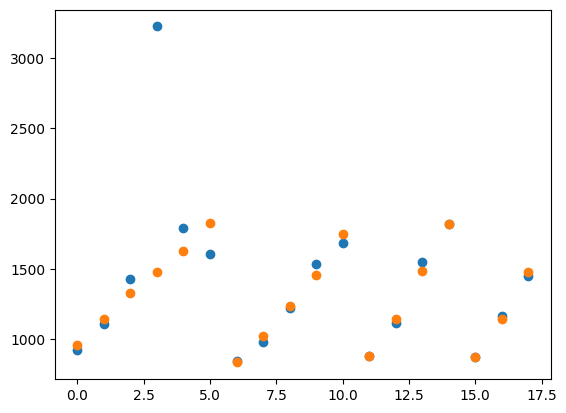

In [276]:
xpl = list(range(len(V0)))
plt.scatter(xpl,Tm)
plt.scatter(xpl,Tme)
plt.show()

